# **Polynomial Model**

![Alternative Text](Temporal_Decisions.png)
$$x_1+x_2=x_3$$
$$x_3-x_4^2=x_5$$
$$2x_2+x_4=x_6$$
$$x_5+\sqrt{x_6}-x_7=x_8$$
$$x_8-2(x_9+x_1^3)=x_{10}$$

*The ultimate goal is to determine the percentage of variables that converge into their acceptable ranges based on the order in which the analyses are performed.  The ranges for the alotted variables are given below.  These ranges would act in a similar manner as rules and/or requirements in a vessel design.*

$$1 \leq x_1 < 5$$
$$1 \leq x_2 < 5$$
$$0 \leq x_3 < 8.5$$
$$0.5 \leq x_4 < 6$$
$$-2 \leq x_5 < 9$$
$$1.5 \leq x_6 < 10$$
$$-3.5 \leq x_7 < 4$$
$$-3.5 \leq x_8 < 2.5$$
$$-4 \leq x_9 < 3$$
$$1 \leq x_{10} < 10$$

*The polynomial model runs its analyses in [number] different orders: (1) 1,2,3,4; (2) 2,1,3,4; (3) 3,4,1-2, (4) 4,1,2-3.  Each of the runs will start by creating 10,000 different sets of input variables within the ranges shown above, and the other values will be backed out based on the provided equations.  At the end of each of the four runs, all ten variables will be evaluated to see what percentage of the 10 variables fall within their alotted range.  The inputs will always fall within the given range as they are given values randomly within their known bounds.  The outputs will fall within or out of range based on the combination of inputs chosen.  Later on, the code can involve some sort of rework in an attempt to get all of the outputs to stay within their bounds, but for the time being, the code is only meant to show the success rate in convergence for different solution paths.*

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Analysis Functions

*Defining the analysis functions that will be called on later.*

In [2]:
# Analysis 1 - forward and backward
def analysis1(number1, number2):
    number3 = number1 + number2
    return number3

def analysis1_back(number3, number1or2):
    number2or1 = number3 - number1or2
    return number2or1


# Analysis 1 & 2 Combined
def analysis12(number1, number5, number6):
    number4 = ((-1/2) + ((1/2)**2 - 4*1*(number5 - number1 - number6/2))**(1/2)) / (2*1)
    return number4


# Analysis 2
def analysis2(number2, number3, number4):
    number5 = number3 - number4**2
    number6 = 2*number2 + number4
    return number5, number6

def analysis2_back4(number5, number6, number4):
    number2 = (number6 - number4) / 2
    number3 = number5 + number4**2
    return number2, number3
    

# Analysis 3
def analysis3(number5, number6, number7):
    number8 = number5 + number6**(1/2) - number7
    return number8

def analysis3_back7(number5, number6, number8):
    number7 = number5 + number6**(1/2) - number8
    return number7


# Analysis 4
def analysis4(number8, number9, number1):
    number10 = number8 - 2*(number9 + number1**3)
    return number10

## Variable Checking Function

*Checking that the variables fall within their bounds regardless of the Run and variations.*

In [3]:
# for loop and if statements checking variable ranges
def variable_checker(Run, Run_success):
    for i in range(0,len(Run)):
        if Run[i,0] >= 1 and Run[i,0] < 5:
            Run_success[0] += 1
        if Run[i,1] >=1 and Run[i,1] < 5:
            Run_success[1] += 1
        if Run[i,2] >= 0 and Run[i,2] < 8.5:
            Run_success[2] += 1
        if Run[i,3] >= 0.5 and Run[i,3] < 6:
            Run_success[3] += 1
        if Run[i,4] >= -2 and Run[i,4] < 9:
            Run_success[4] += 1
        if Run[i,5] >= 1.5 and Run[i,5] < 10:
            Run_success[5] += 1
        if Run[i,6] >= -3.5 and Run[i,6] < 4:
            Run_success[6] += 1
        if Run[i,7] >= -3.5 and Run[i,7] < 2.5:
            Run_success[7] += 1
        if Run[i,8] >= -4 and Run[i,8] < 3:
            Run_success[8] += 1
        if Run[i,9] >= 1 and Run[i,9] < 10:
            Run_success[9] += 1
    return Run_success

## Random Inputs

*Assigning random float values to the necessary inputs of each run within the respective variable bounds.*

In [4]:
# Create a 10,000 x 10 array of zeros for each run
Run1 = np.zeros((10000, 10))
Run2 = np.zeros((10000, 10))
Run3 = np.zeros((10000, 10))
Run4 = np.zeros((10000, 10))

# Change input bounds for first run (i.e. x1, x2, x4, x7, x9)
for i in range(0,len(Run1)):
    Run1[i,0] = np.random.uniform(1,5)
    Run1[i,1] = np.random.uniform(1,5)
    Run1[i,3] = np.random.uniform(0.5,6)
    Run1[i,6] = np.random.uniform(-3,4)
    Run1[i,8] = np.random.uniform(-4,3)
    
# Change input bounds for second run (i.e. x2, x3, x4, x7, x9)
for i in range(0,len(Run2)):
    Run2[i,1] = np.random.uniform(1,5)
    Run2[i,2] = np.random.uniform(0,8.5)
    Run2[i,3] = np.random.uniform(0.5,6)
    Run2[i,6] = np.random.uniform(-3,4)
    Run2[i,8] = np.random.uniform(-4,3)
    
# Change input bounds for third run (i.e. x1, x5, x6, x7, x9) - I need either x1, x2, x3, or x4...Don't think this matters as much though
for i in range(0,len(Run3)):
    Run3[i,0] = np.random.uniform(1,5)
    Run3[i,4] = np.random.uniform(-2,9)
    Run3[i,5] = np.random.uniform(1.5,10)
    Run3[i,6] = np.random.uniform(-3,4)
    Run3[i,8] = np.random.uniform(-4,3)
    
# Change input bounds for fourth run (i.e. x1, x2, x4, x8, x9) - I need either x4, x5, x6, or x7
for i in range(0,len(Run4)):
    Run4[i,0] = np.random.uniform(1,5)
    Run4[i,1] = np.random.uniform(1,5)
    Run4[i,3] = np.random.uniform(0.5,6)
    Run4[i,7] = np.random.uniform(-3.5,2.5)
    Run4[i,8] = np.random.uniform(-4,3)

## Dependent Outputs

*Calling the analysis functions to produce the variable outputs.*

In [5]:
# Call analysis functions as necessary for first run
Run1[:,2] = analysis1(Run1[:,0], Run1[:,1])
Run1[:,4], Run1[:,5] = analysis2(Run1[:,1], Run1[:,2], Run1[:,3])
Run1[:,7] = analysis3(Run1[:,4], Run1[:,5], Run1[:,6])
Run1[:,9] = analysis4(Run1[:,7], Run1[:,8], Run1[:,0])

# Call analysis functions as necessary for second run
Run2[:,4], Run2[:,5] = analysis2(Run2[:,1], Run2[:,2], Run2[:,3])
Run2[:,0] = analysis1_back(Run2[:,2], Run2[:,1])
Run2[:,7] = analysis3(Run2[:,4], Run2[:,5], Run2[:,6])
Run2[:,9] = analysis4(Run2[:,7], Run2[:,8], Run2[:,0])

# Call analysis functions as necessary for third run
Run3[:,7] = analysis3(Run3[:,4], Run3[:,5], Run3[:,6])
Run3[:,9] = analysis4(Run3[:,7], Run3[:,8], Run3[:,0])
Run3[:,3] = analysis12(Run3[:,0], Run3[:,4], Run3[:,5]) # Warning can pop up for a complex number
Run3[:,1], Run3[:,2] = analysis2_back4(Run3[:,4], Run3[:,5], Run3[:,3])

# Call analysis functions as necessary for fourth run
Run4[:,9] = analysis4(Run4[:,7], Run4[:,8], Run4[:,0])
Run4[:,2] = analysis1(Run4[:,0], Run4[:,1])
Run4[:,4], Run4[:,5] = analysis2(Run4[:,1], Run4[:,2], Run4[:,3])
Run4[:,6] = analysis3_back7(Run4[:,4], Run4[:,5], Run4[:,7])

C:\Users\joeyv\AppData\Local\Temp/ipykernel_19324/1807672822.py:13: RuntimeWarning: invalid value encountered in sqrt
  number4 = ((-1/2) + ((1/2)**2 - 4*1*(number5 - number1 - number6/2))**(1/2)) / (2*1)


## Path Dependency Statitistics

*Calculating the percentage of variables that fall within their given bounds for each set of four runs.*

In [6]:
# Create array that tracks successful bounds for each variable of each run
Run1_success = np.zeros(len(Run1[0]))
Run2_success = np.zeros(len(Run2[0]))
Run3_success = np.zeros(len(Run3[0]))
Run4_success = np.zeros(len(Run4[0]))

# Loop through all of the variables checking their bounds for each run
Run1_success = variable_checker(Run1, Run1_success)
Run2_success = variable_checker(Run2, Run2_success)
Run3_success = variable_checker(Run3, Run3_success)
Run4_success = variable_checker(Run4, Run4_success)
    
# Turn successful runs into a percentage for each variable of each run
Run1_success = np.around(Run1_success / len(Run1) * 100, 2)
Run2_success = np.around(Run2_success / len(Run2) * 100, 2)
Run3_success = np.around(Run3_success / len(Run3) * 100, 2)
Run4_success = np.around(Run4_success / len(Run4) * 100, 2)

## Results

*Displaying the results for the four runs.*

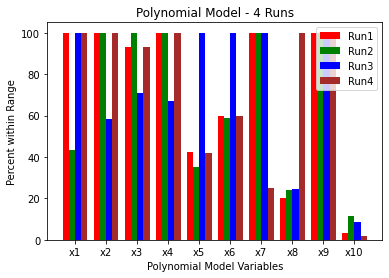

In [7]:
# Create a bar plot for all of the variables of all of the runs
x = np.arange(10)
x_data = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
plt.title("Polynomial Model - 4 Runs")
plt.bar(x-0.3, Run1_success, color = 'red', width = 0.2)
plt.bar(x-0.1, Run2_success, color = 'green', width = 0.2)
plt.bar(x+0.1, Run3_success, color = 'blue', width = 0.2)
plt.bar(x+0.3, Run4_success, color = 'brown', width = 0.2)
plt.xticks(x, x_data)
plt.xlabel("Polynomial Model Variables")
plt.ylabel("Percent within Range")
plt.legend(["Run1", "Run2", "Run3", "Run4"], loc='upper right')
plt.show()